# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [8]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

print(a[-3:])

# reverse the list

print(a[::-1])

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])

c = [i**2 for i in a]
print(c)

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [9]:
# create a numpy array from this list
import numpy as np
b = None # change this
b = np.array(a)
print(b)

[1 2 3 4 5 6]


In [10]:
# find the mean of b
b.mean()

3.5

In [11]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
z = np.square(b)
print(z)

[ 1  4  9 16 25 36]


In [12]:
# change b from a length-6 list to a 2x3 matrix
m = b.reshape(2,3)
print(m)

[[1 2 3]
 [4 5 6]]


In [16]:
# find the mean value of each row
m.mean(axis = 1)

array([2., 5.])

In [17]:
# find the mean value of each column
m.mean(axis = 0)

array([2.5, 3.5, 4.5])

In [18]:
# find the third column of b
m[:,2]

array([3, 6])

In [19]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')

In [20]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

193.87190082644628

In [29]:
# how many different categories of beverages are there?
len(df['beverage_category'].unique())

9

In [30]:
# what is the average # calories for each beverage category?
df.groupby('beverage_category')['calories'].mean()

beverage_category
Classic Espresso Drinks             140.172414
Coffee                                4.250000
Frappuccino Blended Coffee          276.944444
Frappuccino Blended Crème           233.076923
Frappuccino Light Blended Coffee    162.500000
Shaken Iced Beverages               114.444444
Signature Espresso Drinks           250.000000
Smoothies                           282.222222
Tazo Tea Drinks                     177.307692
Name: calories, dtype: float64

In [31]:
# what beverage preparation includes the most sugar on average?
df.groupby('beverage_prep')['sugars'].mean().idxmax()

'Whole Milk'

In [32]:
# what is the average % daily value calcium content for each beverage?
df.groupby('beverage')['calcium'].mean()

beverage
Banana Chocolate Smoothie                           20.000000
Brewed Coffee                                        0.500000
Caffè Americano                                      1.500000
Caffè Latte                                         35.000000
Caffè Mocha Without Whipped Cream                   30.000000
Cappuccino                                          22.500000
Caramel                                             11.000000
Caramel Apple Spice Without Whipped Cream            0.000000
Caramel Macchiato                                   28.333333
Caramel Without Whipped Cream                       12.000000
Coffee                                              12.333333
Espresso                                             0.000000
Hot Chocolate Without Whipped Cream                 35.000000
Iced Brewed Coffee With Classic Syrup                0.000000
Iced Brewed Coffee With Milk  Classic Syrup          8.000000
Java Chip                                           11.666667

In [34]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df['scaled calories'] = (df['calories'] - df['calories'].min())/(df['calories'].max() - df['calories'].min())
df['scaled protein'] = (df['protein'] - df['protein'].min())/(df['protein'].max() - df['protein'].min())

df['protein/calories'] = df['scaled protein']/df['scaled calories']

df['protein/calories'].idxmax()
df[['beverage_category','beverage','beverage_prep']].loc[2]

beverage_category           Coffee
beverage             Brewed Coffee
beverage_prep               Grande
Name: 2, dtype: object

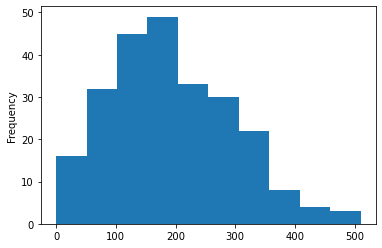

In [35]:
# plot the distribution of the number of calories in drinks using matplotlib
from matplotlib import pyplot as plt
df['calories'].plot.hist(bins = 10)

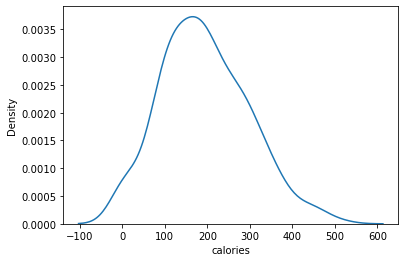

In [36]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.kdeplot(data=df,x='calories')

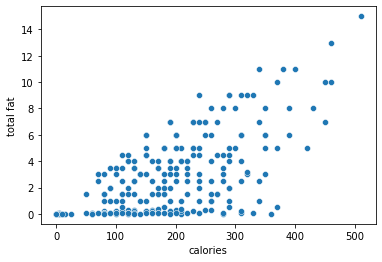

In [37]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df,x='calories',y='total fat')

/home/radia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/radia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/radia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 0, 'Calories')

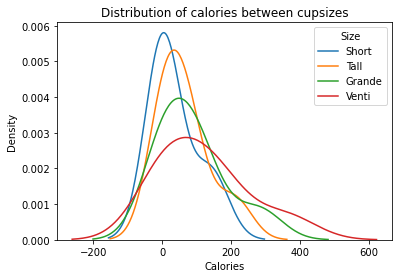

In [38]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.
def make_size(x):
    cups = ['Short','Tall','Grande','Venti']
    for size in cups:
        if x == (size + ' Nonfat Milk'):
            x = x.replace(x,' Nonfat Milk')
            
    return x

df['type'] = df.beverage_prep.apply(make_size)

for size in ['Short','Tall','Grande','Venti']:
    
    subset = df[df['type'] == size]
    
    sns.distplot(subset['calories'],hist=False,kde=True, label=size)

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
plt.legend(title = 'Size')
plt.title('Distribution of calories between cupsizes')
plt.xlabel('Calories')